<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Principle Component Analysis**


![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/PCA.jpeg)

Estimated time needed: **45** minutes


## Use cases of PCA

*   Facial Recognition
*   Image Compression
*   Finding patterns in data of high dimension in the field of quantitative finance.

For instance, suppose you are a fund manager who has 200 stocks in a portfolio. To analyze the potential movements and relationships of the stocks, you would need to  at least work with a 200$\times$200 correlation or covariance matrix, which is very complex.

However, instead of looking at 200 stock variances, would it be more efficient to just look at 10 most dominant/principal directions of variances that best represent the original variances of the stocks?

PCA is a methodology to reduce the dimensionality of a complex problem.

<img src='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/fundmanager.jpg' style="width: 70%">


In this notebook, you will explore how to simplify and reduce the dimensionality of various data using **principle component analysis** (PCA)


## **Table of Contents**

<!-- <a href="#Principle-Component-Analysis">Principle Component Analysis</a> -->

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Background">Background</a>
        <ol>
            <li><a href="https://##What-does-PCA-do?">What does PCA do?</a></li>
            <li><a href="https://#How-does-PCA-work?-(optional)">How does PCA work? (optional)</a></li>
        </ol>
    </li>
    <li>
        <a href="https://##Visual-Example">Visual Example</a>
        <ol>
            <li><a href="https://#Scaling-data">Scaling Data</a></li>
            <li><a href="https://#Applying-PCA">Applying PCA</a></li>
            <li><a href="https://#Putting-it-all-Together">Putting it all Together</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Using-PCA-to-Improve-Facial-Recognition">Using PCA to Improve Facial Recognition</a>
    </li>
</ol>

<a href="https://#Exercises">Exercises</a>

<ol>
    <li><a href="https://#Exercise-1---Scaling-the-Data">Exercise 1 - Scaling the Data</a></li>
    <li><a href="https://#Exercise-2---Fitting-PCA-Object">Exercise 2 - Fitting PCA Object</a></li>
    <li><a href="https://#Exercise-3---Finding-Desired-Number-of-Components">Exercise 3 - Finding Desired Number of Components</a></li>
    <li><a href="https://#Exercise-4---Dimensionality-Reduction">Exercise 4 - Dimentionality Reduction</a></li>
</ol>


***


## Objectives


After completing this lab you will be able to:


*   **Understand** what PCA is and how (generally) it works.
*   **Understand** when PCA is useful.
*   **Apply** PCA effectively.


## Datasets

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the MIT License.


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for additional plotting tools.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or locally) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install pandas==1.3.4 ..."

### Importing Required Libraries


In [2]:
def warn(*args, **kwargs):
  pass

import warnings
warnings.warn = warn

warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook') # configure seaborn plots
sns.set_style('white') # configure seaborn plots style
%matplotlib inline
from tqdm import tqdm   # to make progress bar
from itertools import accumulate  # consecutive operation (default: sum)

In [4]:
# Import 'scikit-learn' libraries
from sklearn.datasets import fetch_lfw_people # Labeled Face in the Wild (face recoginition data)
from sklearn.preprocessing import StandardScaler  # Standarddization
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC  # Support Vector Machine
from scipy.stats import loguniform #log-uniform (reciprocal) distribution
from sklearn.decomposition import PCA # Principal Component Analysis
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Test for 'accumulate' funciton

data = [1, 2, 3, 4, 5]
result = list(accumulate(data))
print(result)
# Output: [1, 3, 6, 10, 15]
# (1, 1+2, 1+2+3, 1+2+3+4, 1+2+3+4+5)

import operator
result = list(accumulate(data, operator.mul))
print(result)
# Output: [1, 2, 6, 24, 120]
# (1, 1*2, 1*2*3, 1*2*3*4, 1*2*3*4*5)

[1, 3, 6, 10, 15]
[1, 2, 6, 24, 120]


### Defining Helper Functions

Below, we define helper functions to simplify your code later on:


In [6]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

## Background

Before we begin using **PCA**, we should first understand:

1.  What PCA does
2.  How PCA Works


### What does PCA do?

*   Reduces the dimensionality of data. By reducing data dimensionality, PCA can also help with visualization.
*   May reduce noise in the process

\-Can be used to pre-process data improving the result of your algorithm


### How does PCA work? (optional)

1.  Looks at an $n$ -dimensional dataset and breaks it down into "general trends" or **components**

```
- When we say "$n$-dimensional", we mean the data has $n$ features.
```

2.  The components are then **sorted by how much of the explained variance they account for** (*eigenvalues* provide this information)

```
- This means if a component is highly-uncorrelated with all others, it's a "strong" component and provides useful information that is very hard to infer from all other components.
```

3.  Then, given some parameter (usually chosen by the data engineer), the new dimension of the data is decided. Let this be $k$.

```
- Note $k$ is always $k \leq n$ because we're only trying to reduce the dimension of our data.
```

4.  Finally, the original $n$ dimensional dataset is projected onto the $k$-dimensional plane chosen by our **top-$k$ components that take care of the most explained variance**.

```
- These top- $k$ components are now used
```

Because principle components span an (at most) $k$-dimensional surface, we have successfully reduced our data to at least $k \leq n$ dimensions!


## Visual Example

Let's look at an example that will visually demonstrate PCA in action.

Load the dataset `HeightsWeights.csv` which contains a list of various people's heights (in inches) and weight (in pounds and kg):


In [7]:
hwdf = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/HeightsWeights.csv', index_col=0)
hwdf.head()

,Height(Inches),Weight(Pounds),Weight(Kilograms)
Index,,,
1,65.78331,112.9925,51.253062
2,71.51521,136.4873,61.910233
3,69.39874,153.0269,69.412546
4,68.21660,142.3354,64.562914
5,67.78781,144.2971,65.452735


### Scaling data

**You should (almost) always scale your data before applying PCA**

**Why?**: There are many reasons, here are some:

*   Scaling your features make the features have the same standard deviation => same weight.

*   If the features have the same weight, PCA is able to best find the most significant components (principal components) without being biased towards features with high variance.

*   Computers do not do well in adding large numbers and small numbers, so, if all data is in the same range  algorithms usually perform better.

Let's use the `StandardScaler` from `sklearn.preprocessing`:


In [8]:
hwdf[:].head(3)

,Height(Inches),Weight(Pounds),Weight(Kilograms)
Index,,,
1,65.78331,112.9925,51.253062
2,71.51521,136.4873,61.910233
3,69.39874,153.0269,69.412546


In [9]:
scaler = StandardScaler()
# Assign the array values into dataframe
hwdf[:] = scaler.fit_transform(hwdf)
hwdf.head(3)

,Height(Inches),Weight(Pounds),Weight(Kilograms)
Index,,,
1,-1.162051,-1.208072,-1.208072
2,1.852136,0.806805,0.806805
3,0.739165,2.225214,2.225214


In [10]:
hwdf.columns = [f'{c} (scaled)' for c in hwdf.columns] # change column names
hwdf.head(3)

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Index,,,
1,-1.162051,-1.208072,-1.208072
2,1.852136,0.806805,0.806805
3,0.739165,2.225214,2.225214


Let's look at 3-D plot of our data (one dimension per feature):


In [11]:
# Assign each column into each variables
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]

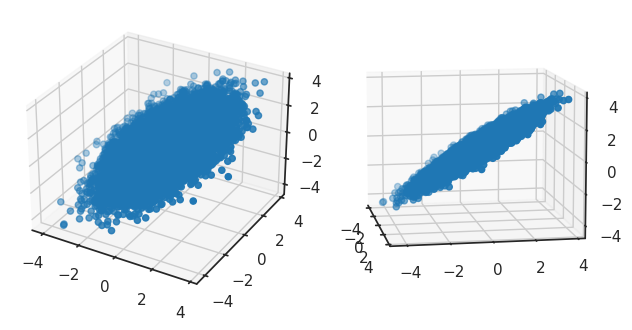

In [12]:
fig = plt.figure()

# For figure 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(xs, ys, zs)


# For figure 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=10, azim=-10)  # viewing perspetive
ax2.scatter(xs, ys, zs)

plt.tight_layout()
plt.show()

As you can see, our data here forms a plane.

This is because the *weight in kilograms does not provide any more information than weight in pounds* (or vice-versa).

This becomes clear with the following, alternate perspective, showing the 2d relationships between the pairs of data and calculating the correlation  :


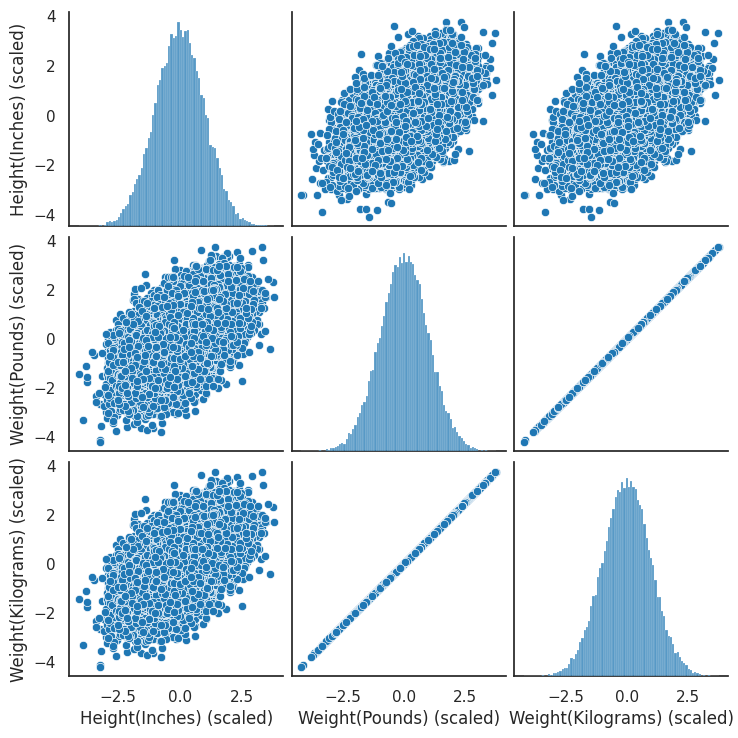

In [13]:
sns.pairplot(hwdf)
plt.show()

In [14]:
hwdf.corr().style.background_gradient(cmap='coolwarm')

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Height(Inches) (scaled),1.000000,0.502859,0.502859
Weight(Pounds) (scaled),0.502859,1.000000,1.000000
Weight(Kilograms) (scaled),0.502859,1.000000,1.000000


We see the weights are perfectly correlated, which means **Weight(Pounds)** tells us everything we need to know about **Weight(Kilograms)** ,thus we have clearly **redundant** data! Although, this example is exaggerated, it'll help demonstrate where PCA shines.


<b>Note</b> Standardizing your data before applying PCA is called *whitening*.


### Applying PCA

It's time to apply PCA, let's first apply PCA keeping the same dimension as the original data, i.e.: `n_components=3`.


In [15]:
pca = PCA().fit(hwdf)

We can find the projection of the dataset onto the principal components call it `Xhat` , this is our "new" dataset, it is the same shape as the original dataset


In [16]:
hwdf.shape

(25000, 3)

In [17]:
Xhat = pca.transform(hwdf)
Xhat.shape  # numpy array

(25000, 3)

Let’s look at the new dataset as a dataframe.


In [18]:
columns = [f'Projection on Component {i+1}' for i in range(len(hwdf.columns))]
columns

['Projection on Component 1',
 'Projection on Component 2',
 'Projection on Component 3']

In [19]:
hwdf_PCA = pd.DataFrame(columns=columns, data=Xhat)
hwdf_PCA.head(3)

,Projection on Component 1,Projection on Component 2,Projection on Component 3
0,-2.051774,-0.243847,1.094627e-15
1,1.866218,1.117813,3.299626e-16
2,3.133436,-0.794420,3.332217e-16


**Why** are the values in the third column all essentially zero?

Let's look at the principle components:


In [20]:
colors = ['red', 'blue', 'green']
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]

In [21]:
# Test asetrisk "*"
h = [[1,2,3], [4,5,6]]
for i in h:
  print(i)
  print(*i)

[1, 2, 3]
1 2 3
[4, 5, 6]
4 5 6


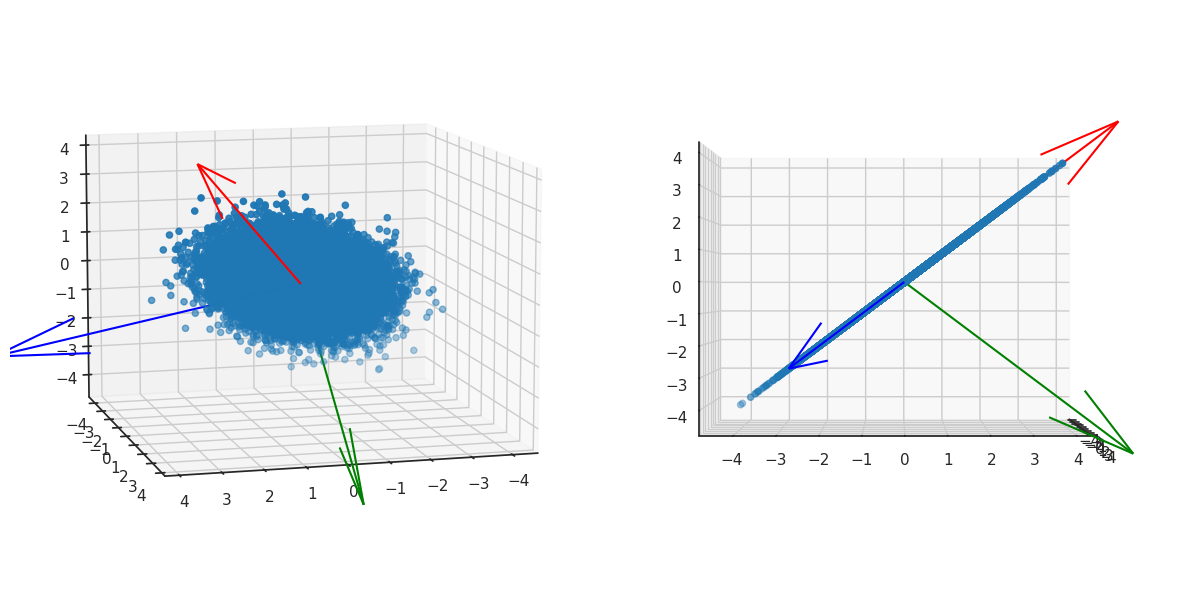

In [22]:
fig = plt.figure(figsize=(12,8))

# For figure 1
ax1 = fig.add_subplot(121, projection='3d')
ax1.view_init(elev=10, azim=75)
ax1.scatter(xs, ys, zs)

# For figure 2
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=0, azim=0)
ax2.scatter(xs, ys, zs)

for component, color in zip(pca.components_, colors):
  ax1.quiver(*[0,0,0], *(8 * component), color=color)
  ax2.quiver(*[0,0,0], *(8 * component), color=color)

plt.tight_layout()
plt.show()

In [23]:
pca.explained_variance_ratio_, pca.explained_variance_,

(array([0.78977642, 0.21022358, 0.        ]),
 array([2.36942405, 0.63069596, 0.        ]))

In [24]:
for color, ev in zip(colors, pca.explained_variance_ratio_):
    print(f'{color} component accounts for {ev * 100:.2f}% of explained variance')

red component accounts for 78.98% of explained variance
blue component accounts for 21.02% of explained variance
green component accounts for 0.00% of explained variance


The 3 colored arrows represent the directions of maximum variance in the original data `hwdf`. The new dataset `Xhat` is the projection of `hwdf` onto each principal component.

Most of the original data seems parallel to the red principle components meaning they are the two most dominant directions of variance of `hwdf`. The  green component is perpendicular to the data, as a result the projection is small.


We convert this new data to a Dataframe and see the points appear uncorrelated:


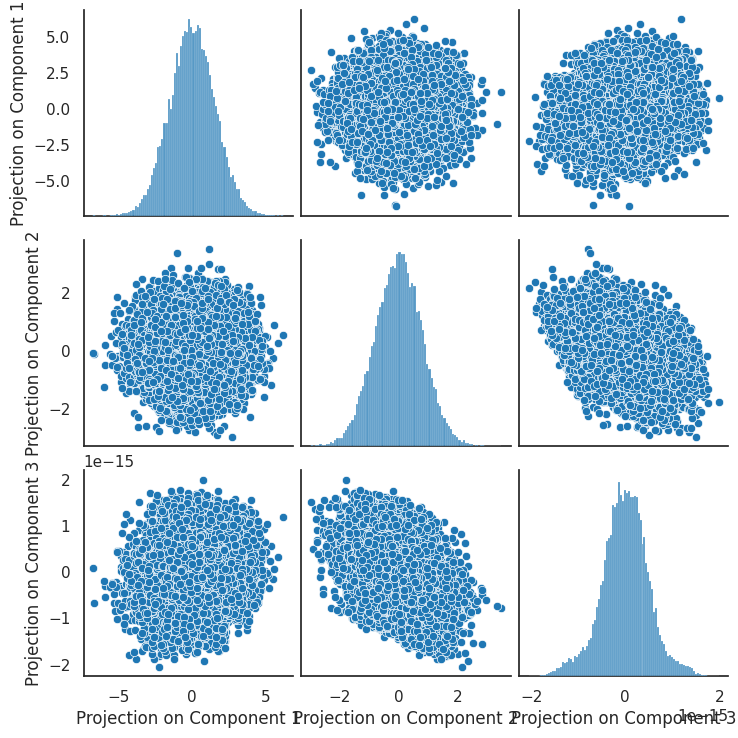

In [25]:
sns.pairplot(hwdf_PCA)
plt.show()

In [26]:
hwdf_PCA.corr().style.background_gradient(cmap='coolwarm')

,Projection on Component 1,Projection on Component 2,Projection on Component 3
Projection on Component 1,1.000000,-0.000000,0.156017
Projection on Component 2,-0.000000,1.000000,-0.412401
Projection on Component 3,0.156017,-0.412401,1.000000


As you can see, the correlations of the 3 principal components are now zero, meaning we have successfully de-correlated `hwdf` and obtained features that are linearly independent of each other.

Each component provides variance/information on a different direction. As we saw before that, the third component had a small projection, which means it doesn't provide much information about our original data `hwdf` in the new feature space.

Thus, we can remove the third dimension, while still keeping the vast majority of our data's information:


In [27]:
hwdf_PCA.drop('Projection on Component 3', axis=1, inplace=True)
hwdf_PCA.head()

,Projection on Component 1,Projection on Component 2
0,-2.051774,-0.243847
1,1.866218,1.117813
2,3.133436,-0.794420
3,1.696186,-0.748473
4,1.803402,-1.058234


### Putting it all Together


Now that you have some intuition behind PCA, let's start from the beginning and understand the PCA-pipeline.

In **sklearn.decomposition.PCA**, there is a parameter called `whiten` which helps standardize your input data if you set `whiten = True`. You could also use `StandardScaler()` as a separate step before using PCA.


In [28]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(hwdf), index=hwdf.index, columns=hwdf.columns)
X.head(3)

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Index,,,
1,-1.162051,-1.208072,-1.208072
2,1.852136,0.806805,0.806805
3,0.739165,2.225214,2.225214


In [29]:
columns = [f"Component {i}" for i in range(pca.n_components_)]
columns

['Component 0', 'Component 1', 'Component 2']

In [30]:
pca = PCA()
X_PCA = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=columns)
# (Remember it's technically "Projection onto Component {i}")
X_PCA.head()

,Component 0,Component 1,Component 2
Index,,,
1,-2.051774,-0.243847,1.179062e-15
2,1.866218,1.117813,2.899065e-16
3,3.133436,-0.794420,5.765177e-17
4,1.696186,-0.748473,-4.504161e-16
5,1.803402,-1.058234,-2.240654e-16


By default, `sklearn.decomposition.PCA` sorts the components by their explained variance.

Let's analyze the explained variance ratios:


**Test defined function "def plot_explained_variance()"**

In [31]:
evr = pca.explained_variance_ratio_
evr

array([0.78977642, 0.21022358, 0.        ])

In [32]:
0.78977642 + 0.21022358

1.0

In [33]:
acc = [*accumulate(evr)] # consecutive sum (default)
acc
# [0.78977642, 0.78977642+0.21022358, 0.78977642+0.21022358+0.0]
# [0.78977642, 1.0, 1.0]

[np.float64(0.789776424063212), np.float64(1.0), np.float64(1.0)]

In [34]:
n_comp = pca.n_components_ # 3 features
n_comp

3

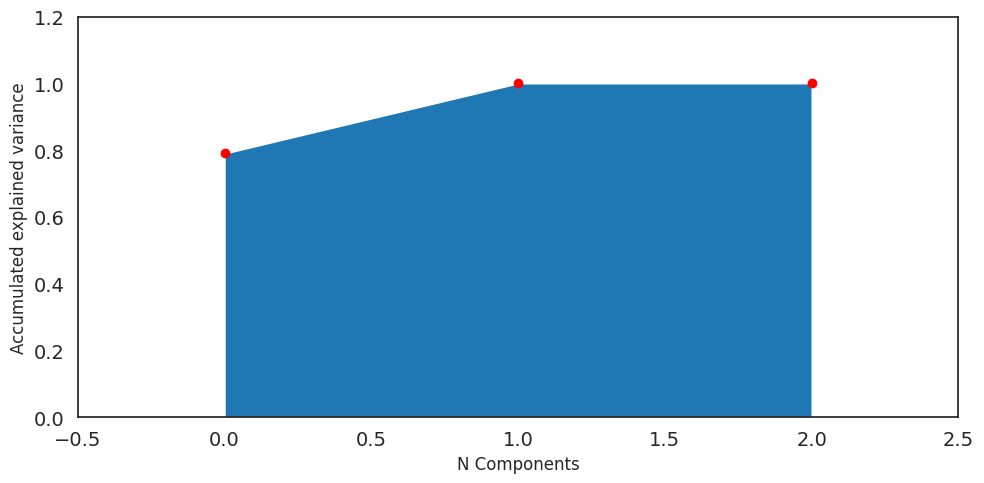

In [35]:
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.stackplot(range(n_comp), acc)
ax.scatter(range(n_comp), acc, color='red')

ax.set_ylim(0, 1.2)
ax.set_xlim(-0.5, n_comp-0.5)
ax.tick_params(axis='both', labelsize=14)
ax.set(xlabel='N Components', ylabel='Accumulated explained variance')

plt.tight_layout()
plt.show()

In [36]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    n_comp = pca.n_components_
    fig, ax = plt.subplots(1, figsize=(10, 5))
    ax.stackplot(range(n_comp), acc)
    ax.scatter(range(n_comp), acc, color='red')

    ax.set_ylim(0, 1.2)
    ax.set_xlim(-0.5, n_comp-0.5)
    ax.tick_params(axis='both', labelsize=14)
    ax.set(xlabel='N Components', ylabel='Accumulated explained variance')

    plt.tight_layout()
    plt.show()

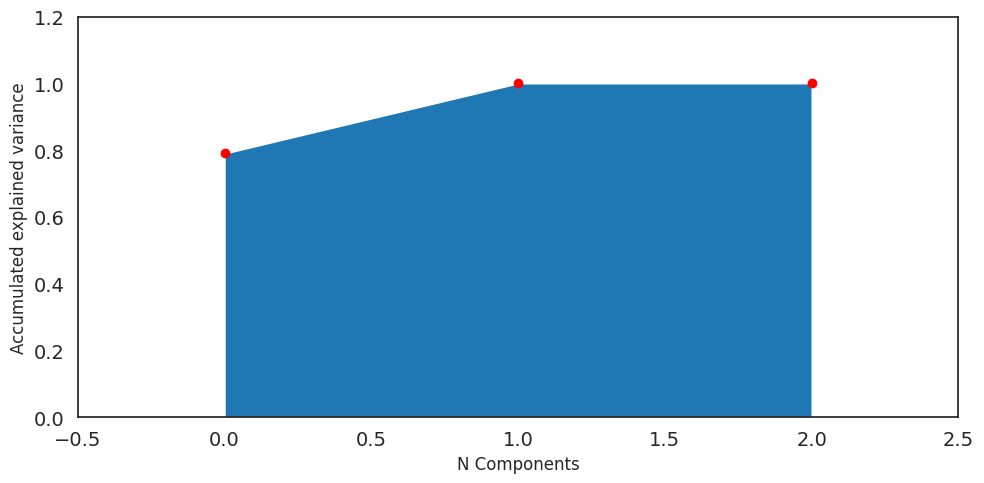

In [37]:
plot_explained_variance(pca)

Suppose a $99%$ threshold is sufficient for our task, let's see how many components (dimensions) we can drop:


In [38]:
threshold = 0.99

In [39]:
# Test *accumulate()
[*accumulate(pca.explained_variance_ratio_)]

[np.float64(0.789776424063212), np.float64(1.0), np.float64(1.0)]

In [40]:
# Check using for-loop
for i, x in enumerate(accumulate(pca.explained_variance_ratio_)):
  print(i, x)

0 0.789776424063212
1 1.0
2 1.0


In [41]:
# Check using for-loop, start from 0
[(i, x) for i, x in enumerate(accumulate(pca.explained_variance_ratio_)) if x >= threshold]

[(1, np.float64(1.0)), (2, np.float64(1.0))]

In [42]:
# Check using for-loop, start from 1 based on condition
[(i, x) for i, x in enumerate(accumulate(pca.explained_variance_ratio_), start=1) if x >= threshold]

[(2, np.float64(1.0)), (3, np.float64(1.0))]

In [43]:
# Test "next()" function
my_list = iter(["apple", "banana", "cherry"])
h = next(my_list)
print(h)
h = next(my_list)
print(h)
h = next(my_list)
print(h)

apple
banana
cherry


In [44]:
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_), start=1) if x >= threshold)
num

2

In [45]:
print(f'We can keep the first {num} components and discard the other {n_comp-num},')
print(f'keeping >= {100 * threshold}% of the explained variance!')

We can keep the first 2 components and discard the other 1,
keeping >= 99.0% of the explained variance!


In [46]:
pca.n_components_

3

In [47]:
range(num, pca.n_components_) # 2 to 3

range(2, 3)

In [48]:
[f"Component {i}" for i in range(num, pca.n_components_)]

['Component 2']

In [49]:
X_PCA.drop([f"Component {i}" for i in range(num, pca.n_components_)], axis=1, inplace=True)

In [50]:
X_PCA.head(3)

,Component 0,Component 1
Index,,
1,-2.051774,-0.243847
2,1.866218,1.117813
3,3.133436,-0.794420


## Using PCA to Improve Facial Recognition

PCA is commonly used for Facial Recognition.

In this example, we will apply a method called "**Eigenfaces**"

The idea of *eigenfaces* is:

1.  You have images of faces of dimension $a \times b$ pixels.
2.  You "roll" these out into vectors of size $a \cdot n$.
3.  You apply PCA to the vectors.
4.  You determine how many principal components you want to train under; let's call this $C$.
5.  You train on the original image-vectors of size $a \cdot b$ projected onto your $C$ components, reshaped back to $a \times b$ bitmaps.


Load the Labeled Faces in the Wild (LFW) people datasetclassification


In [51]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
lfw_people

{'data': array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
         0.3803922 ],
        [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
         0.53594774],
        [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
         0.7163399 ],
        ...,
        [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
         0.19346406],
        [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
         0.6117647 ],
        [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
         0.2535948 ]], dtype=float32),
 'images': array([[[0.9973857 , 0.99607843, 0.9921568 , ..., 0.29803923,
          0.24836601, 0.20653595],
         [0.9973857 , 0.9921569 , 0.9908497 , ..., 0.30588236,
          0.2535948 , 0.21568628],
         [0.96078426, 0.93071896, 0.8679738 , ..., 0.2875817 ,
          0.24183007, 0.21568628],
         ...,
         [0.34509805, 0.26143792, 0.17385621, ..., 0.4248366 ,
     

Introspect the images arrays to find the shapes (for plotting)


In [52]:
# Introspect the images arrrays to find the shapes (for plotting)
N, h, w = lfw_people.images.shape
N, h, w

(1288, 50, 37)

In [53]:
target_names = lfw_people.target_names
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

We load our features <code>X</code> and labels <code>y</code>. The images are flattened such that each one is a row in the NumPy array <code>X</code>


In [54]:
y = lfw_people.target
X = lfw_people.data
n_features = X.shape[1]
n_features

1850

We plot out each class and an image belonging to that class:


In [55]:
np.unique(lfw_people.target) # 7 people data

array([0, 1, 2, 3, 4, 5, 6])

In [56]:
np.argmax(lfw_people.target == 3)

np.int64(2)

In [57]:
for person in np.unique(lfw_people.target):
  idx = np.argmax(lfw_people.target == person)
  # np.argmax() flatten the array first and find the max value
  # It will choose the 1st value for the same numbers ([5 6 3 ... 5 3 5])
  # The result will be 2 based on the above number

In [58]:
lfw_people.images.shape

(1288, 50, 37)

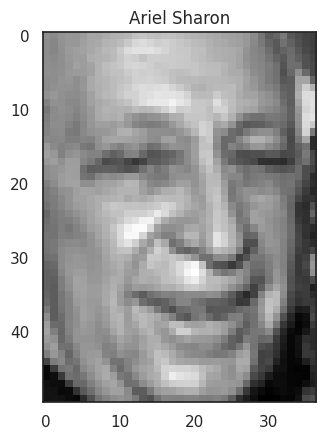

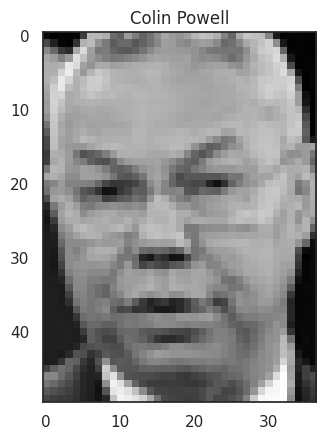

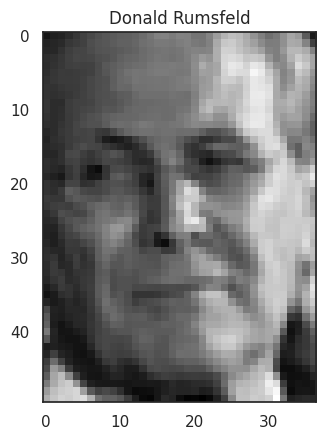

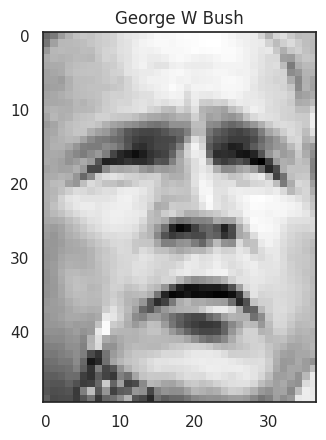

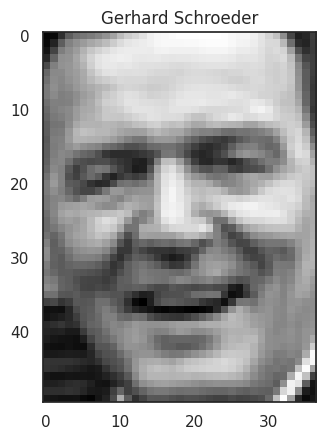

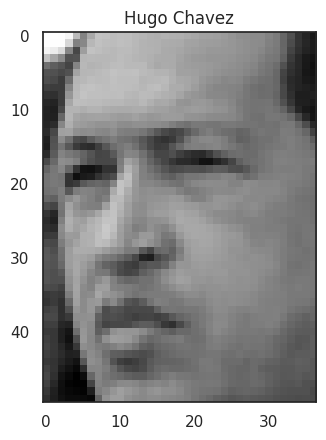

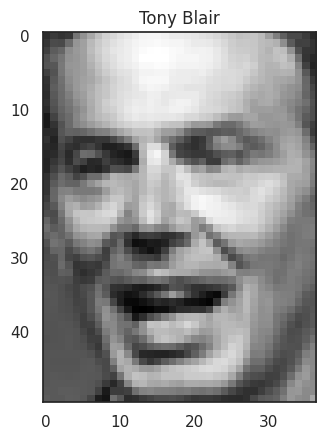

In [59]:
for person in np.unique(lfw_people.target):
  idx = np.argmax(lfw_people.target == person)
  plt.imshow(lfw_people.images[idx], cmap='grey')
  plt.title(lfw_people.target_names[person])
  plt.show()

We split the data into training and testing


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

We train a Support Vector Machines model for classification and use a random search method to find a set of optimal hyperparameters


In [61]:
# Create distribution object
loguniform(1e3, 1e5)

# Stores the distribution with parameters a=1000, b=100000.
# Can be used to sample, plot, get PDF/mean/variance, etc.

In [62]:
# Can be used with many functions
loguniform(1e3, 1e5).mean(), loguniform(1e3, 1e5).std()

(np.float64(21497.576854210973), np.float64(24969.617949318843))

In [63]:
loguniform.rvs(1e3, 1e5) # draw one random sample

np.float64(11756.515630308537)

In [64]:
loguniform.rvs(1e3, 1e5, size=2) # draw two random sample

array([ 2065.04585868, 56582.24356621])

In [65]:
param_grid = {
              "C": loguniform(1e3, 1e5),
              "gamma": loguniform(1e-4, 1e-1)
              }

In [66]:
clf = RandomizedSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                         param_grid, n_iter=10)
# "RandomizedSearchCV" is used for finding the best hyperparameters
# but more efficiently than grid search.
# Faster, especially when the search space is large.

In [67]:
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(class_weight='balanced'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b805ddfe210>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b805dfa6150>})

We make a prediction using the test data:


In [68]:
y_pred = clf.predict(X_test)

Let's see how well our `SVC` did on the test data:


In [69]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[ 10,   0,   3,   0,   0,   0,   0],
       [  2,  50,   1,   4,   0,   1,   2],
       [  4,   1,  17,   3,   1,   0,   1],
       [  1,   5,   2, 135,   2,   0,   1],
       [  0,   1,   0,   1,  20,   0,   3],
       [  0,   3,   0,   2,   0,  10,   0],
       [  1,   1,   0,   4,   2,   0,  28]])

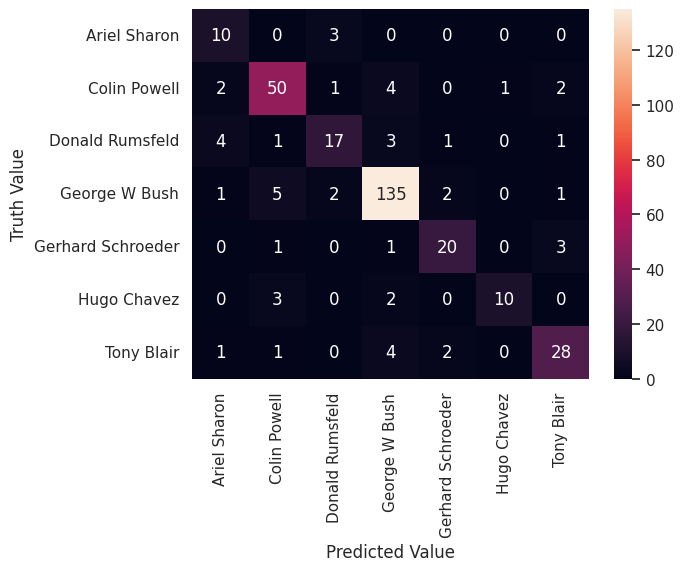

In [70]:
hmap = sns.heatmap(cf,  # confusion matrix
                   annot = True, # added annotation
                   xticklabels = lfw_people.target_names, # tick labels on X-axis
                   yticklabels = lfw_people.target_names, # tick labels on Y-axis
                   fmt = 'g') # general format

hmap.set_xlabel('Predicted Value')  # X-axis label
hmap.set_ylabel('Truth Value')      # Y-axis label
plt.show()

# Default: X-axis = Predicted value | Y-axis = Actual value (default in CF)

We see all the images are being classifed as George Bush. Clearly it's having trouble differentiating between the faces.


Now, let’s try using PCA, we fit a PCA model :


In [71]:
pca = PCA(svd_solver='full', # Singular Value Decomposition
          whiten=True)
pca.fit(X_train)

PCA(svd_solver='full', whiten=True)

We find the projections on to each principle  component for a person int the dataset, we select the sample <code>person_index</code> :


In [72]:
person_index = 1

In [73]:
X[person_index, :].shape # 2nd row

(1850,)

In [74]:
X[person_index, :].reshape(1, -1).shape

(1, 1850)

In [75]:
Xhat = pca.transform(X[person_index, :].reshape(1, -1))
Xhat.shape  # transform to low dimensional data (Compression)

(1, 966)

We can find the projections back to each component, i.e the inverse transform;as we use all the non-zero components the images are identical.


In [76]:
h, w

(50, 37)

In [77]:
# transform back to original dimensional data (Decompression)
ivt = pca.inverse_transform(Xhat)
ivt.shape

(1, 1850)

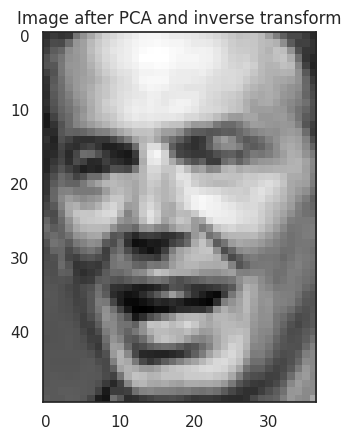

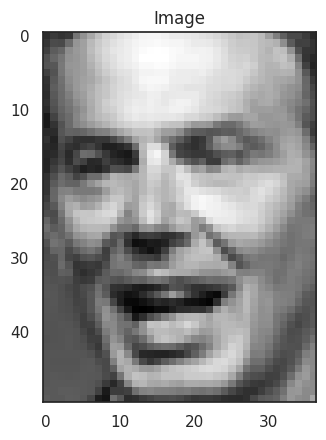

In [78]:
plt.imshow(ivt.reshape(h, w), cmap='gray')
plt.title("Image after PCA and inverse transform")
plt.show()

plt.imshow(lfw_people.images[person_index], cmap='gray')
plt.title("Image")
plt.show()

We can use the Explained variance-ratio to determine the number of components to keep, we can plot it as Cumulative distribution.


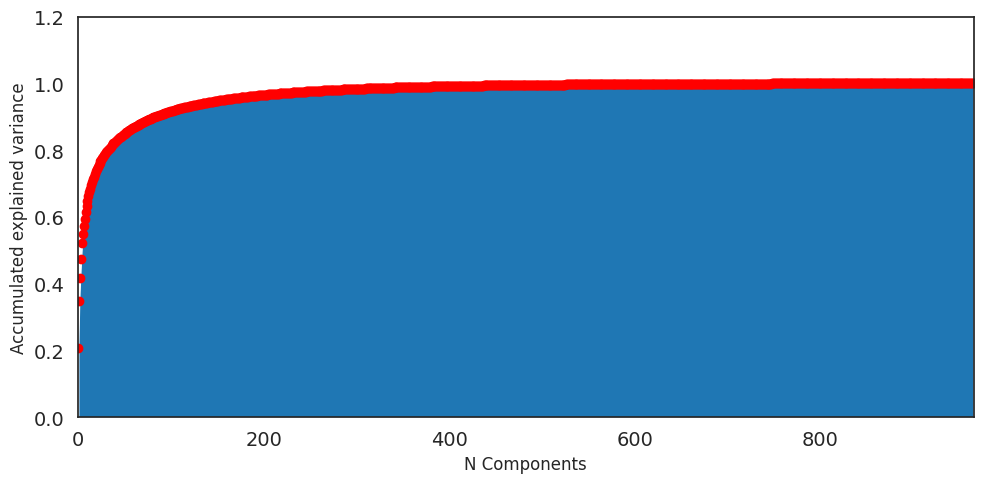

In [79]:
plot_explained_variance(pca)

It looks like 150 components explain over 95% of the variance, usually 80% will do, let’s try and visualize some components.

<p>
<b>Note:</b> you can use Cross-validation to select the number of components  
</p>


Let’s select the  components that explain over 60% of the variance


In [80]:
threshold = 0.60

This corresponds to 7 principle components


In [81]:
pca.explained_variance_ratio_[:5]

array([0.20860405, 0.14046933, 0.0672567 , 0.05641383, 0.04898054],
      dtype=float32)

In [82]:
# Test for cumulative sum
np.cumsum([1,2,3,4,5])

array([ 1,  3,  6, 10, 15])

In [83]:
np.cumsum(pca.explained_variance_ratio_)[:5]

array([0.20860405, 0.34907338, 0.41633007, 0.4727439 , 0.52172446],
      dtype=float32)

In [84]:
components = np.cumsum(pca.explained_variance_ratio_) < threshold
components[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False])

In [85]:
components.sum() # total 8 items

np.int64(8)

We can reshape the principle components to a rectangle  and plot them, remember the images are linear  combinations of these components


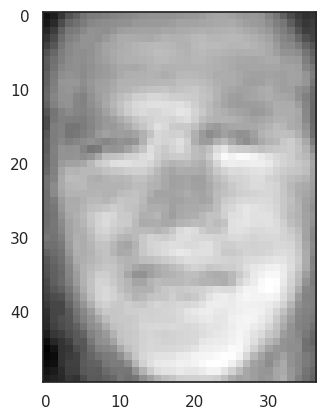

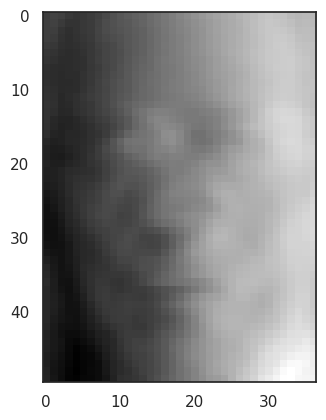

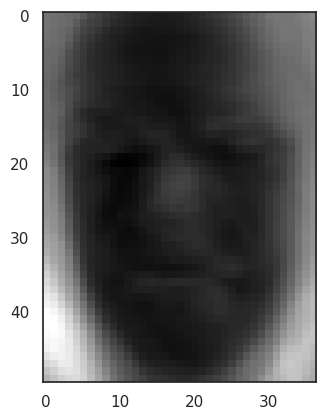

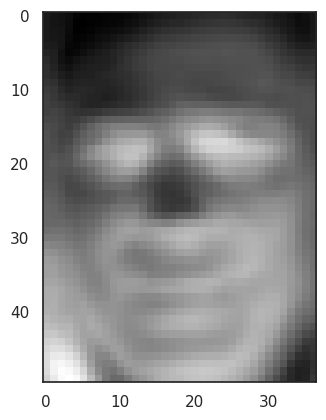

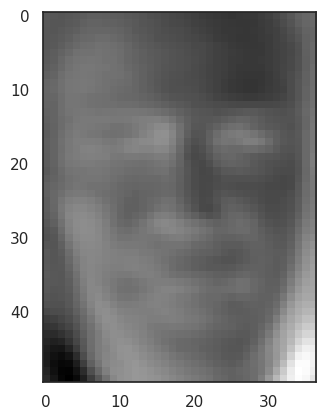

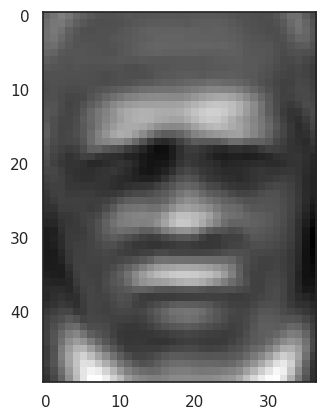

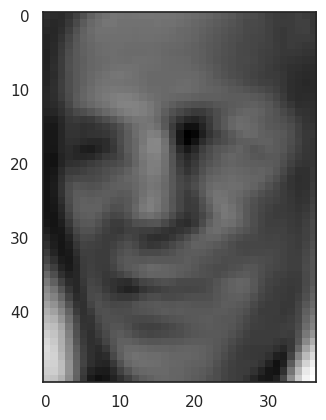

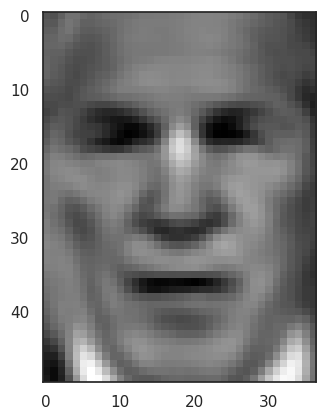

In [86]:
for component in pca.components_[components,:]:
    plt.imshow(component.reshape(h, w),cmap='gray')
    plt.show()

Let's now use PCA with `n_components = 150`:


In [87]:
pca = PCA(n_components=150, svd_solver="randomized", whiten=True).fit(X_train)

We apply the PCA transform on the training and testing data


In [88]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**NOTE**: We can also transform the data back ("inverse_transform") to its original space, with the rest of the components to zero, then convert it to an image. For instance, let's look at one of the images using <code>person_index = 1</code>


In [89]:
person_index = 1

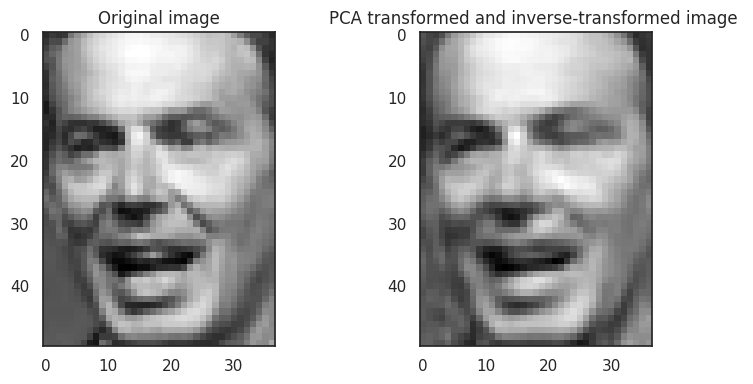

In [90]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.imshow(lfw_people.images[person_index,:,:],cmap='gray')
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(pca.inverse_transform(pca.transform(X[person_index ,:].reshape(1, -1))).reshape(h, w),cmap='gray')
plt.title("PCA transformed and inverse-transformed image ")

plt.tight_layout()
plt.show()

We train the model and find the best Hyperparameters using the transformed data:


In [91]:
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

clf = clf.fit(X_train_pca, y_train)

We see the model using PCA performs much better!


In [92]:
y_pred = clf.predict(X_test_pca)

Text(46.24999999999999, 0.5, 'Truth Value')

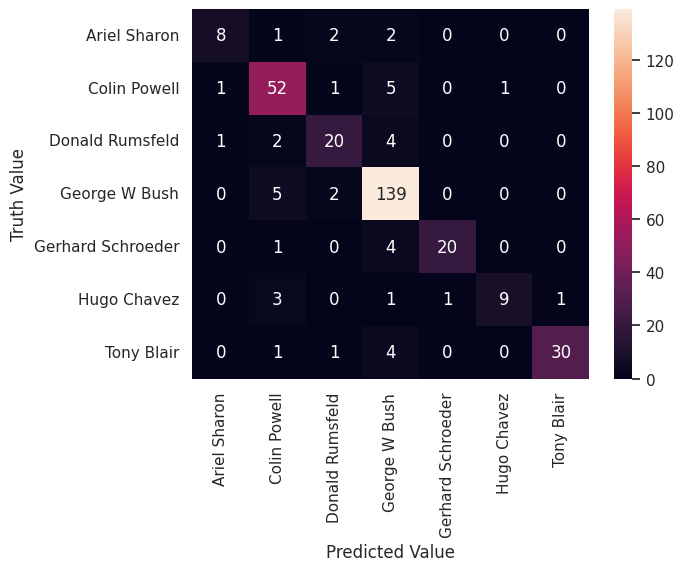

In [93]:
hmap = sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    xticklabels=lfw_people.target_names,
    yticklabels=lfw_people.target_names,
    fmt='g'
)
hmap.set_xlabel('Predicted Value')
hmap.set_ylabel('Truth Value')

# Exercises

Run the following code cell to complete the exercises

We download and clean the dataset `energydata_complete.csv` containing real-world energy data:


In [100]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/energydata_complete.csv'

In [102]:
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [103]:
df.drop('date', axis=1, inplace=True) # removed date column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [104]:
df.isnull().sum()

,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0
RH_4,0


In [109]:
# Drop NA values and change all columns to float
df = df.dropna().astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  float64
 1   lights       19735 non-null  float64
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

In [110]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


The columns represent as per following information:-  


`date` - time year-month-day hour:minute:second  
`Appliances` - energy use in Wh  
`lights` - energy use of light fixtures in the house in Wh  
`T1` - Temperature in kitchen area in Celsius  
`RH_1` - Humidity in kitchen in %  
`T2` - Temperature in living room in Celsius  
`RH_2` - Humidity in living room  in %  
`T3` - Temperature in laundry room area  
`RH_3` - Humidity in laundry room  in %  
`T4` - Temperature in office room in Celsius  
`RH_4` - Humidity in office room in %  
`vT5` - Temperature in bathroom in Celsius  
`RH_5` - Humidity in bathroom in %  
`T6` - Temperature outside the building (north side) in Celsius  
`RH_6` - Humidity outside the building (north side) in %  
`T7` - Temperature in ironing room in Celsius  
`RH_7` - Humidity in ironing room in %  
`T8` - Temperature in teenager room 2 in Celsius  
`RH_8` - Humidity in teenager room 2 in %  
`T9` - Temperature in parents room in Celsius  
`RH_9` - Humidity in parents room in %  
`To` - Temperature outside (from Chievres weather station) in Celsius  
`Pressure` (from Chievres weather station) in mm Hg  
`RH_out` - Humidity outside (from Chievres weather station) in %  
`Wind speed` - (from Chievres weather station) in m/s  
`Visibility` - (from Chievres weather station) in km  
`Tdewpoint` - (from Chievres weather station) in Â°C  
`rv1` - Random variable 1 nondimensional  
`rv2` - Random variable 2 nondimensional  
  

    

Please see the [data source](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for more information.

## Exercise 1 - Scaling the Data


Scale the data in `df` using sklearn.preprocessing.StandardScaler

(You don't need to change the names of the columns like we did in the examples).


In [121]:
# My code
from sklearn.preprocessing import StandardScaler as SS
df[:] = SS().fit_transform(df.values)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.233869,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294,0.252109,0.252109
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-1.233869,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454,1.408801,1.408801
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-1.233869,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613,-1.028122,-1.028122


<details>
    <summary>Click here for Solution</summary>

```python
scaler = StandardScaler()
df[:] = scaler.fit_transform(df)
df.head()
```

</details>


## Exercise 2 - Fitting PCA Object


Create a `PCA` object called `pca` and fit it to the dataframe `df`

(You don't need to change the names of the columns).


In [122]:
# My code
from sklearn.decomposition import PCA
pca = PCA().fit(df) # learn from data

<details>
    <summary>Click here for Solution</summary>

```python
pca = PCA()
pca.fit(df)
```

</details>


## Exercise 3 - Finding Desired Number of Components


Find the minimum number of components that cover a total explained variance of $95%$ or more


In [126]:
evr = pca.explained_variance_ratio_
evr

array([3.33172320e-01, 2.52259306e-01, 7.18276518e-02, 6.64382383e-02,
       4.52776181e-02, 3.73476473e-02, 3.50246845e-02, 3.26159265e-02,
       2.70621160e-02, 1.99099305e-02, 1.87817542e-02, 1.34431675e-02,
       8.49721966e-03, 6.33311028e-03, 5.10396877e-03, 4.92824947e-03,
       4.17242243e-03, 3.97781684e-03, 3.34499164e-03, 2.53200195e-03,
       2.39495505e-03, 1.60830021e-03, 1.49417144e-03, 1.01006697e-03,
       8.02250484e-04, 5.07887706e-04, 1.32225894e-04, 0.00000000e+00])

In [134]:
evr_sum = np.cumsum(evr)
evr_sum

array([0.33317232, 0.58543163, 0.65725928, 0.72369752, 0.76897513,
       0.80632278, 0.84134747, 0.87396339, 0.90102551, 0.92093544,
       0.93971719, 0.95316036, 0.96165758, 0.96799069, 0.97309466,
       0.97802291, 0.98219533, 0.98617315, 0.98951814, 0.99205014,
       0.9944451 , 0.9960534 , 0.99754757, 0.99855764, 0.99935989,
       0.99986777, 1.        , 1.        ])

In [135]:
np.argwhere(evr_sum >= 0.95)[0][0] + 1

np.int64(12)

<details>
    <summary>Click here for a Sample Solution</summary>

```python
np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.95)[0][0] + 1
```

</details>


## Exercise 4 - Dimensionality Reduction


Reduce your dataset to one with PCA applied to it, where the new number of dimensions is the answer you got in the Exercise 3.

Assign the result to a variable called `reduced_data`. (No need to convert the result to a `pandas.DataFrame`).

Hint: It might be easiest to use a new `PCA` object using the [`n_components` parameter](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


In [139]:
pca = PCA(n_components=12)
reduced_data = pca.fit_transform(df) # learn and transform

<details>
    <summary>Click here for a Sample Solution</summary>

```python
pca = PCA(n_components=12)
reduced_data = pca.fit(df).transform(df)
```

</details>


Let's view the result as a `pandas.DataFrame`:


In [141]:
reduced_data.shape

(19735, 12)

In [143]:
[f"Component {i}" for i in range(reduced_data.shape[1])]

['Component 0',
 'Component 1',
 'Component 2',
 'Component 3',
 'Component 4',
 'Component 5',
 'Component 6',
 'Component 7',
 'Component 8',
 'Component 9',
 'Component 10',
 'Component 11']

In [144]:
pd.DataFrame(reduced_data, columns=[f"Component {i}" for i in range(reduced_data.shape[1])]).head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11
0,-2.922039,4.688402,-1.548784,1.200384,1.953325,-0.372920,2.529788,0.640358,2.475223,-0.748954,-1.448401,-0.514303
1,-2.940551,4.617382,-1.026564,1.273485,1.958929,-0.495274,2.237205,0.583417,2.463552,-0.854024,-1.437129,-0.443660
2,-2.983922,4.532971,-0.057812,1.455761,1.925351,-0.626959,1.941323,0.559629,2.499994,-0.949800,-1.460569,-0.450196
3,-3.074540,4.511345,1.503160,1.955986,2.803530,-0.560489,1.565011,0.474951,3.320774,-1.015321,-1.598426,-0.410259
4,-3.050297,4.486200,-1.798191,0.976510,2.843927,-0.700518,1.271911,0.287486,3.287537,-1.118611,-1.607082,-0.419324


# Congratulations! - You have completed the lab


## Authors

[Sam Prokopchuk](https://www.linkedin.com/in/sam-prokopchuk-1908b21a0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)


### Other Contributors


[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By     | Change Description          |
| ----------------- | ------- | -------------- | --------------------------- |
| 2021-12-20        | 0.1     | Sam Prokopchuk | Complete Exercises' content |
| 2022-05-20        | 0.2     | Roxanne Li     | Review and edit             |
| 2022-07-15        | 0.2     | Svitlana K     | Review and edit             |


Copyright © 2021 IBM Corporation. All rights reserved.
